In [38]:
pwd

'/Users/raghavgupta/Documents/MATLAB'

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Reading files

In [40]:
walking_Acc = pd.read_excel('WALKING_Acceleration.xlsx',sheet_name='Sheet1')
walking_AngV = pd.read_excel('WALKING_AngularVelo.xlsx',sheet_name='Sheet1')
walking_Mag = pd.read_excel('WALKING_MagneticField.xlsx',sheet_name='Sheet1')
walking_Orin = pd.read_excel('WALKING_Orientation.xlsx',sheet_name='Sheet1')

In [41]:
walking_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2020-12-05 13:31:42.479,-0.373024,3.338807,9.894574
1,2020-12-05 13:31:42.579,-0.349972,3.130590,8.996741
2,2020-12-05 13:31:42.678,-2.262844,3.643873,11.095078
3,2020-12-05 13:31:42.777,-1.526077,3.015629,7.404502
4,2020-12-05 13:31:42.877,-1.605412,3.552263,8.743168


In [42]:
walking_AngV= walking_AngV.drop('Timestamp',axis=1)
walking_Mag = walking_Mag.drop('Timestamp',axis=1)
walking_Orin = walking_Orin.drop('Timestamp',axis=1)

In [43]:
frames = [walking_Acc,walking_AngV,walking_Mag,walking_Orin]

In [44]:
WALKING_Activty = pd.concat(frames,axis=1)

In [45]:
WALKING_Activty.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,2020-12-05 13:31:42.479,-0.373024,3.338807,9.894574,-0.306696,0.121774,-0.012860,-15.610714,-9.701384,-45.315269,-90.290531,-20.854614,-1.578646
1,2020-12-05 13:31:42.579,-0.349972,3.130590,8.996741,0.475092,0.237736,0.547077,-15.127773,-10.636854,-45.303429,-93.210211,-22.649603,-1.474825
2,2020-12-05 13:31:42.678,-2.262844,3.643873,11.095078,-0.064975,0.486336,1.121323,-13.737292,-9.004610,-45.969810,-98.060699,-22.179592,-0.420587
3,2020-12-05 13:31:42.777,-1.526077,3.015629,7.404502,0.045129,0.698615,1.584100,-10.055559,-8.089186,-47.371422,-104.382494,-22.249171,2.664644
4,2020-12-05 13:31:42.877,-1.605412,3.552263,8.743168,-0.472488,1.197645,0.164387,-4.993298,-6.964613,-48.111656,-105.524289,-21.243693,9.161114


In [46]:
WALKING_Activty['Activity'] = 'Walking'

In [47]:
WALKING_Activty['Activity_Value'] = 1

In [48]:
WALKING_Activty.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
0,2020-12-05 13:31:42.479,-0.373024,3.338807,9.894574,-0.306696,0.121774,-0.012860,-15.610714,-9.701384,-45.315269,-90.290531,-20.854614,-1.578646,Walking,1
1,2020-12-05 13:31:42.579,-0.349972,3.130590,8.996741,0.475092,0.237736,0.547077,-15.127773,-10.636854,-45.303429,-93.210211,-22.649603,-1.474825,Walking,1
2,2020-12-05 13:31:42.678,-2.262844,3.643873,11.095078,-0.064975,0.486336,1.121323,-13.737292,-9.004610,-45.969810,-98.060699,-22.179592,-0.420587,Walking,1
3,2020-12-05 13:31:42.777,-1.526077,3.015629,7.404502,0.045129,0.698615,1.584100,-10.055559,-8.089186,-47.371422,-104.382494,-22.249171,2.664644,Walking,1
4,2020-12-05 13:31:42.877,-1.605412,3.552263,8.743168,-0.472488,1.197645,0.164387,-4.993298,-6.964613,-48.111656,-105.524289,-21.243693,9.161114,Walking,1


In [49]:
WALKING_Activty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 15 columns):
Timestamp         1210 non-null datetime64[ns]
Acc_X             1210 non-null float64
Acc_Y             1210 non-null float64
Acc_Z             1210 non-null float64
AngV_X            1212 non-null float64
AngV_Y            1212 non-null float64
AngV_Z            1212 non-null float64
Mag_X             1196 non-null float64
Mag_Y             1196 non-null float64
Mag_Z             1196 non-null float64
Orin_X            1196 non-null float64
Orin_Y            1196 non-null float64
Orin_Z            1196 non-null float64
Activity          1212 non-null object
Activity_Value    1212 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 142.2+ KB


In [50]:
WALKING_Activty.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity_Value
count,1210.000000,1210.000000,1210.000000,1212.000000,1212.000000,1212.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1212.0
mean,-0.281151,-0.691466,10.420003,0.018934,-0.021240,0.066406,-2.020920,0.113454,-41.882892,-1.721166,0.944196,-2.498227,1.0
std,1.933649,2.260057,2.270171,1.334828,0.523728,1.247688,13.510411,15.880750,4.571724,93.368534,18.131757,8.813923,0.0
min,-6.968459,-6.910230,3.706293,-3.570305,-3.746679,-5.381252,-30.202763,-35.057930,-55.254845,-176.060582,-42.317893,-23.351318,1.0
25%,-1.487794,-2.384840,9.007818,-0.936704,-0.302191,-0.529261,-13.657100,-11.929675,-45.289055,-101.368442,-14.478604,-8.850266,1.0
50%,-0.137115,-0.750165,10.502535,0.045035,-0.028736,0.071601,-1.246574,-0.145393,-42.577370,13.260321,1.147374,-2.784911,1.0
75%,1.142200,0.940531,12.038117,1.081679,0.278591,0.774109,9.165805,12.731590,-38.950582,79.748686,16.021402,3.837332,1.0
max,4.311035,6.534811,16.591797,2.957219,1.951392,4.491499,33.229927,33.988377,-17.208961,176.501144,36.333568,46.363130,1.0


In [51]:
on_tab_Acc = pd.read_excel('ON_TABLE_Acceleration.xlsx',sheet_name='Sheet1')
on_tab_AngV = pd.read_excel('ON_TABLE_AngularVelo.xlsx',sheet_name='Sheet1')
on_tab_Mag = pd.read_excel('ON_TABLE_MagneticField.xlsx',sheet_name='Sheet1')
on_tab_Orin = pd.read_excel('ON_TABLE_Orientation.xlsx',sheet_name='Sheet1')

In [52]:
on_tab_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2020-12-05 13:34:57.294,0.039518,0.225880,9.863139
1,2020-12-05 13:34:57.393,0.102088,0.195344,9.905352
2,2020-12-05 13:34:57.492,0.176932,0.152533,9.872869
3,2020-12-05 13:34:57.592,0.237855,0.138163,9.854308
4,2020-12-05 13:34:57.691,0.225282,0.140707,9.862241


In [53]:
on_tab_AngV= on_tab_AngV.drop('Timestamp',axis=1)
on_tab_Mag = on_tab_Mag.drop('Timestamp',axis=1)
on_tab_Orin = on_tab_Orin.drop('Timestamp',axis=1)

In [54]:
on_tab_AngV.head()

,AngV_X,AngV_Y,AngV_Z
0,-0.099640,-0.227324,0.005673
1,-0.070568,-0.169518,0.002822
2,-0.002268,-0.017572,0.002520
3,0.047695,0.087759,0.001029
4,0.044634,0.074590,0.000976


In [55]:
frames2 = [on_tab_Acc,on_tab_AngV,on_tab_Mag,on_tab_Orin]

In [56]:
ON_TABLE_Activty = pd.concat(frames2,axis=1)

In [57]:
ON_TABLE_Activty.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,2020-12-05 13:34:57.294,0.039518,0.225880,9.863139,-0.099640,-0.227324,0.005673,9.468531,-8.381475,-48.958809,-87.877793,-0.830965,-1.239030
1,2020-12-05 13:34:57.393,0.102088,0.195344,9.905352,-0.070568,-0.169518,0.002822,9.533331,-8.599863,-48.903069,-87.946387,-0.890771,-1.109067
2,2020-12-05 13:34:57.492,0.176932,0.152533,9.872869,-0.002268,-0.017572,0.002520,9.596281,-8.489374,-49.066048,-88.007017,-0.940058,-0.996579
3,2020-12-05 13:34:57.592,0.237855,0.138163,9.854308,0.047695,0.087759,0.001029,9.636236,-8.356134,-48.827644,-88.034787,-0.940717,-0.989645
4,2020-12-05 13:34:57.691,0.225282,0.140707,9.862241,0.044634,0.074590,0.000976,9.676661,-8.657091,-49.150841,-88.126675,-0.912542,-1.049392


In [58]:
ON_TABLE_Activty['Activity'] = 'On Table'
ON_TABLE_Activty['Activity_Value'] = 2
ON_TABLE_Activty.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
0,2020-12-05 13:34:57.294,0.039518,0.225880,9.863139,-0.099640,-0.227324,0.005673,9.468531,-8.381475,-48.958809,-87.877793,-0.830965,-1.239030,On Table,2
1,2020-12-05 13:34:57.393,0.102088,0.195344,9.905352,-0.070568,-0.169518,0.002822,9.533331,-8.599863,-48.903069,-87.946387,-0.890771,-1.109067,On Table,2
2,2020-12-05 13:34:57.492,0.176932,0.152533,9.872869,-0.002268,-0.017572,0.002520,9.596281,-8.489374,-49.066048,-88.007017,-0.940058,-0.996579,On Table,2
3,2020-12-05 13:34:57.592,0.237855,0.138163,9.854308,0.047695,0.087759,0.001029,9.636236,-8.356134,-48.827644,-88.034787,-0.940717,-0.989645,On Table,2
4,2020-12-05 13:34:57.691,0.225282,0.140707,9.862241,0.044634,0.074590,0.000976,9.676661,-8.657091,-49.150841,-88.126675,-0.912542,-1.049392,On Table,2


In [59]:
drop_Acc = pd.read_excel('DROPPING_Acceleration.xlsx',sheet_name='Sheet1')
drop_AngV = pd.read_excel('DROPPING_AngularVelo.xlsx',sheet_name='Sheet1')
drop_Mag = pd.read_excel('DROPPING_MagneticField.xlsx',sheet_name='Sheet1')
drop_Orin = pd.read_excel('DROPPING_Orientation.xlsx',sheet_name='Sheet1')

In [60]:
drop_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2020-12-05 13:37:55.340,0.634231,2.552043,9.715846
1,2020-12-05 13:37:55.440,0.788410,2.308799,9.533675
2,2020-12-05 13:37:55.539,0.847687,2.226470,9.689800
3,2020-12-05 13:37:55.638,0.691861,2.130220,9.805809
4,2020-12-05 13:37:55.738,0.958756,2.420766,9.482631


In [61]:
drop_AngV= drop_AngV.drop('Timestamp',axis=1)
drop_Mag = drop_Mag.drop('Timestamp',axis=1)
drop_Orin = drop_Orin.drop('Timestamp',axis=1)
frames3 = [drop_Acc,drop_AngV,drop_Mag,drop_Orin]
DROPPING_Activty = pd.concat(frames3,axis=1)
DROPPING_Activty.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,2020-12-05 13:37:55.340,0.634231,2.552043,9.715846,-0.088538,-0.033088,0.014241,4.845894,3.320004,-48.037483,3.606273,-13.174169,-4.907007
1,2020-12-05 13:37:55.440,0.788410,2.308799,9.533675,0.029640,-0.028500,0.008914,4.985018,3.914091,-47.929451,3.568220,-12.864408,-4.852434
2,2020-12-05 13:37:55.539,0.847687,2.226470,9.689800,-0.007996,0.091464,0.056166,4.832806,3.717276,-47.731865,3.610018,-12.958350,-4.811496
3,2020-12-05 13:37:55.638,0.691861,2.130220,9.805809,0.107401,0.088667,0.012209,5.171259,3.502110,-47.949928,3.397978,-12.964026,-4.385925
4,2020-12-05 13:37:55.738,0.958756,2.420766,9.482631,-0.523408,0.071673,0.261922,6.364521,4.091101,-47.594276,3.132304,-12.596223,-3.220660


In [62]:
DROPPING_Activty['Activity'] = 'Dropping'
DROPPING_Activty['Activity_Value'] = 3
DROPPING_Activty.head()
DROPPING_Activty.tail()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
1210,2020-12-05 13:39:55.612,-2.711162,1.698069,6.003116,3.254881,-1.773319,1.544093,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1211,2020-12-05 13:39:55.712,0.131576,1.349144,6.124664,0.392671,-0.975087,0.073145,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1212,2020-12-05 13:39:55.811,0.839604,3.015928,5.543422,-0.459943,0.146171,-0.259397,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1213,2020-12-05 13:39:55.911,0.102836,3.144661,5.754933,0.312461,1.184994,-0.015217,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1214,2020-12-05 13:39:56.010,1.393452,4.098327,4.136648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3


# Combining All 3 Activities

In [63]:
frames4 = [WALKING_Activty,ON_TABLE_Activty,DROPPING_Activty]
df_master_grp = pd.concat(frames4,axis=0)
sort=True
df_master_grp.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
0,2020-12-05 13:31:42.479,-0.373024,3.338807,9.894574,-0.306696,0.121774,-0.012860,-15.610714,-9.701384,-45.315269,-90.290531,-20.854614,-1.578646,Walking,1
1,2020-12-05 13:31:42.579,-0.349972,3.130590,8.996741,0.475092,0.237736,0.547077,-15.127773,-10.636854,-45.303429,-93.210211,-22.649603,-1.474825,Walking,1
2,2020-12-05 13:31:42.678,-2.262844,3.643873,11.095078,-0.064975,0.486336,1.121323,-13.737292,-9.004610,-45.969810,-98.060699,-22.179592,-0.420587,Walking,1
3,2020-12-05 13:31:42.777,-1.526077,3.015629,7.404502,0.045129,0.698615,1.584100,-10.055559,-8.089186,-47.371422,-104.382494,-22.249171,2.664644,Walking,1
4,2020-12-05 13:31:42.877,-1.605412,3.552263,8.743168,-0.472488,1.197645,0.164387,-4.993298,-6.964613,-48.111656,-105.524289,-21.243693,9.161114,Walking,1


In [64]:
df_master_grp.tail()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
1210,2020-12-05 13:39:55.612,-2.711162,1.698069,6.003116,3.254881,-1.773319,1.544093,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1211,2020-12-05 13:39:55.712,0.131576,1.349144,6.124664,0.392671,-0.975087,0.073145,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1212,2020-12-05 13:39:55.811,0.839604,3.015928,5.543422,-0.459943,0.146171,-0.259397,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1213,2020-12-05 13:39:55.911,0.102836,3.144661,5.754933,0.312461,1.184994,-0.015217,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
1214,2020-12-05 13:39:56.010,1.393452,4.098327,4.136648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3


In [65]:
df_master_grp = df_master_grp.reset_index()
df_master_grp.tail()

,index,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
3635,1210,2020-12-05 13:39:55.612,-2.711162,1.698069,6.003116,3.254881,-1.773319,1.544093,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3636,1211,2020-12-05 13:39:55.712,0.131576,1.349144,6.124664,0.392671,-0.975087,0.073145,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3637,1212,2020-12-05 13:39:55.811,0.839604,3.015928,5.543422,-0.459943,0.146171,-0.259397,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3638,1213,2020-12-05 13:39:55.911,0.102836,3.144661,5.754933,0.312461,1.184994,-0.015217,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3639,1214,2020-12-05 13:39:56.010,1.393452,4.098327,4.136648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3


In [66]:
df_master_grp['Activity'].unique()

array(['Walking', 'On Table', 'Dropping'], dtype=object)

In [67]:
df_master_grp = df_master_grp.drop('index',axis=1)
df_master_grp.tail()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
3635,2020-12-05 13:39:55.612,-2.711162,1.698069,6.003116,3.254881,-1.773319,1.544093,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3636,2020-12-05 13:39:55.712,0.131576,1.349144,6.124664,0.392671,-0.975087,0.073145,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3637,2020-12-05 13:39:55.811,0.839604,3.015928,5.543422,-0.459943,0.146171,-0.259397,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3638,2020-12-05 13:39:55.911,0.102836,3.144661,5.754933,0.312461,1.184994,-0.015217,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3
3639,2020-12-05 13:39:56.010,1.393452,4.098327,4.136648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dropping,3


In [68]:
df_master_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 15 columns):
Timestamp         3638 non-null datetime64[ns]
Acc_X             3638 non-null float64
Acc_Y             3638 non-null float64
Acc_Z             3638 non-null float64
AngV_X            3639 non-null float64
AngV_Y            3639 non-null float64
AngV_Z            3639 non-null float64
Mag_X             3590 non-null float64
Mag_Y             3590 non-null float64
Mag_Z             3590 non-null float64
Orin_X            3590 non-null float64
Orin_Y            3590 non-null float64
Orin_Z            3590 non-null float64
Activity          3640 non-null object
Activity_Value    3640 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 426.7+ KB


# Data Cleaning

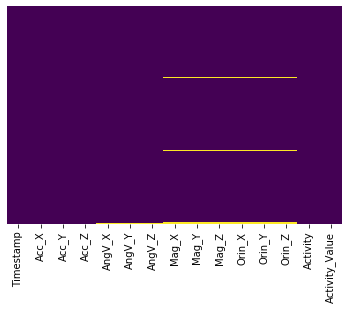

In [69]:
sns.heatmap(df_master_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
df_master_grp.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity_Value
count,3638.000000,3638.000000,3638.000000,3639.000000,3639.000000,3639.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3640.000000
mean,-0.223069,-0.375227,8.675948,-0.002424,0.040082,0.047758,8.748385,-1.630078,-41.440212,-41.932143,-0.197539,-1.172143,2.000824
std,2.775965,2.585873,6.432362,1.331986,2.289999,0.921743,20.250115,17.078137,26.522764,66.992663,13.079626,34.071098,0.816664
min,-35.398987,-61.134071,-74.168516,-11.658416,-33.163933,-10.124564,-142.407135,-90.183540,-148.185059,-177.026402,-77.868474,-179.907814,1.000000
25%,-0.714988,-0.927771,8.124954,-0.232632,-0.156395,-0.103780,3.360003,-8.489295,-49.076103,-88.255222,-3.596258,-4.282645,1.000000
50%,0.180674,0.147593,9.869052,0.008706,0.003286,0.001173,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601,2.000000
75%,0.191152,0.159568,10.339262,0.214831,0.146159,0.282767,16.090746,7.250290,-40.499638,-24.653521,3.064787,2.796825,3.000000
max,75.387132,34.567766,81.057640,12.465687,35.842258,6.369485,104.035507,76.820419,191.054718,176.501144,86.679242,179.488614,3.000000


In [71]:
df_master_grp.isnull()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
3636,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
3637,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
3638,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False


In [72]:
bool_series = pd.isnull(df_master_grp["Acc_X"])
df_master_grp[bool_series]

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
1210,NaT,NaN,NaN,NaN,-0.151536,0.106155,0.070990,NaN,NaN,NaN,NaN,NaN,NaN,Walking,1
1211,NaT,NaN,NaN,NaN,0.163461,0.600621,-0.569023,NaN,NaN,NaN,NaN,NaN,NaN,Walking,1


In [73]:
df_master_grp["Acc_X"].fillna("0.180674", inplace= True)
df_master_grp[bool_series]

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
1210,NaT,0.180674,NaN,NaN,-0.151536,0.106155,0.070990,NaN,NaN,NaN,NaN,NaN,NaN,Walking,1
1211,NaT,0.180674,NaN,NaN,0.163461,0.600621,-0.569023,NaN,NaN,NaN,NaN,NaN,NaN,Walking,1


In [74]:
df_master_grp["Acc_Y"].fillna("0.147593", inplace= True)
df_master_grp[bool_series]

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
1210,NaT,0.180674,0.147593,NaN,-0.151536,0.106155,0.070990,NaN,NaN,NaN,NaN,NaN,NaN,Walking,1
1211,NaT,0.180674,0.147593,NaN,0.163461,0.600621,-0.569023,NaN,NaN,NaN,NaN,NaN,NaN,Walking,1


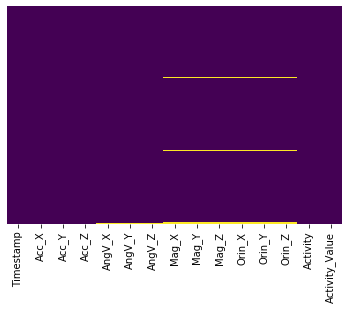

In [75]:
df_master_grp["Acc_Z"].fillna("9.869052", inplace= True)
sns.heatmap(df_master_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

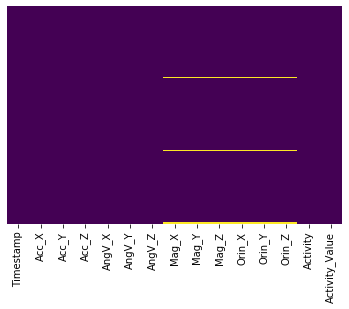

In [76]:
df_master_grp["AngV_X"].fillna("0.008706", inplace= True)
df_master_grp["AngV_Y"].fillna("0.003286", inplace= True)
df_master_grp["AngV_Z"].fillna("0.001173", inplace= True)
sns.heatmap(df_master_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

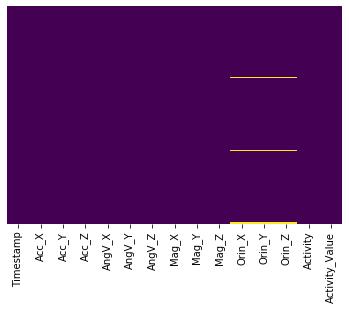

In [77]:
df_master_grp["Mag_X"].fillna("9.570612", inplace= True)
df_master_grp["Mag_Y"].fillna("-8.076317", inplace= True)
df_master_grp["Mag_Z"].fillna("-46.852005", inplace= True)
sns.heatmap(df_master_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

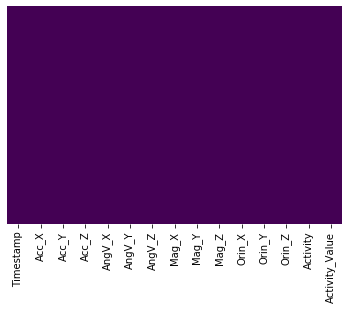

In [78]:
df_master_grp["Orin_X"].fillna("-60.261881", inplace= True)
df_master_grp["Orin_Y"].fillna("-0.891641", inplace= True)
df_master_grp["Orin_Z"].fillna("-1.072601", inplace= True)
sns.heatmap(df_master_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

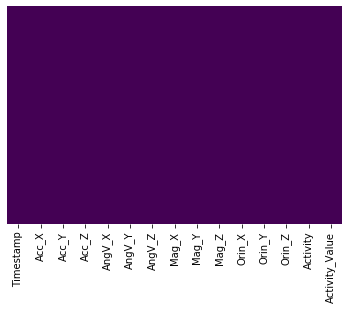

In [79]:
df_master_grp["Timestamp"].fillna( method ='ffill', inplace = True)
sns.heatmap(df_master_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
df_master_grp.tail()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
3635,2020-12-05 13:39:55.612,-2.71116,1.69807,6.00312,3.25488,-1.77332,1.54409,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601,Dropping,3
3636,2020-12-05 13:39:55.712,0.131576,1.34914,6.12466,0.392671,-0.975087,0.073145,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601,Dropping,3
3637,2020-12-05 13:39:55.811,0.839604,3.01593,5.54342,-0.459943,0.146171,-0.259397,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601,Dropping,3
3638,2020-12-05 13:39:55.911,0.102836,3.14466,5.75493,0.312461,1.18499,-0.015217,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601,Dropping,3
3639,2020-12-05 13:39:56.010,1.39345,4.09833,4.13665,0.008706,0.003286,0.001173,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601,Dropping,3


In [81]:
df_master_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 15 columns):
Timestamp         3640 non-null datetime64[ns]
Acc_X             3640 non-null object
Acc_Y             3640 non-null object
Acc_Z             3640 non-null object
AngV_X            3640 non-null object
AngV_Y            3640 non-null object
AngV_Z            3640 non-null object
Mag_X             3640 non-null object
Mag_Y             3640 non-null object
Mag_Z             3640 non-null object
Orin_X            3640 non-null object
Orin_Y            3640 non-null object
Orin_Z            3640 non-null object
Activity          3640 non-null object
Activity_Value    3640 non-null int64
dtypes: datetime64[ns](1), int64(1), object(13)
memory usage: 426.7+ KB


In [82]:
df_master_grp["Acc_X"] = df_master_grp["Acc_X"].astype(str).astype(float)
df_master_grp["Acc_Y"] = df_master_grp["Acc_Y"].astype(str).astype(float)
df_master_grp["Acc_Z"] = df_master_grp["Acc_Z"].astype(str).astype(float)
df_master_grp["AngV_X"] = df_master_grp["AngV_X"].astype(str).astype(float)
df_master_grp["AngV_Y"] = df_master_grp["AngV_Y"].astype(str).astype(float)
df_master_grp["AngV_Z"] = df_master_grp["AngV_Z"].astype(str).astype(float)
df_master_grp["Mag_X"] = df_master_grp["Mag_X"].astype(str).astype(float)
df_master_grp["Mag_Y"] = df_master_grp["Mag_Y"].astype(str).astype(float)
df_master_grp["Mag_Z"] = df_master_grp["Mag_Z"].astype(str).astype(float)
df_master_grp["Orin_X"] = df_master_grp["Orin_X"].astype(str).astype(float)
df_master_grp["Orin_Y"] = df_master_grp["Orin_Y"].astype(str).astype(float)
df_master_grp["Orin_Z"] = df_master_grp["Orin_Z"].astype(str).astype(float)

In [97]:
df_master_grp.info() #no null values, therefore all data cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 15 columns):
Timestamp         3640 non-null datetime64[ns]
Acc_X             3640 non-null float64
Acc_Y             3640 non-null float64
Acc_Z             3640 non-null float64
AngV_X            3640 non-null float64
AngV_Y            3640 non-null float64
AngV_Z            3640 non-null float64
Mag_X             3640 non-null float64
Mag_Y             3640 non-null float64
Mag_Z             3640 non-null float64
Orin_X            3640 non-null float64
Orin_Y            3640 non-null float64
Orin_Z            3640 non-null float64
Activity          3640 non-null object
Activity_Value    3640 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 426.7+ KB


# Visualization of Dataset

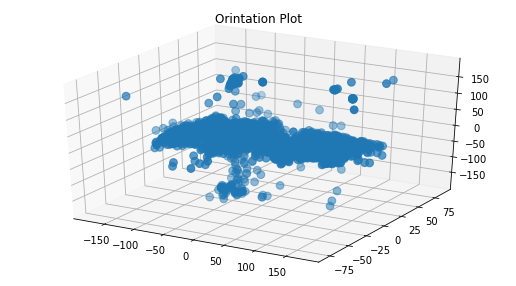

In [84]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = df_master_grp['Orin_Z']
xline = df_master_grp['Orin_X']
yline = df_master_grp['Orin_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Orintation Plot')
plt.show()

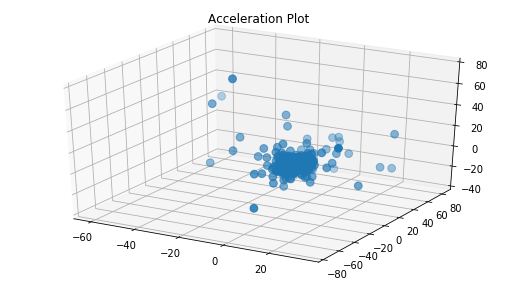

In [85]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = df_master_grp['Acc_X']
xline = df_master_grp['Acc_Y']
yline = df_master_grp['Acc_Z']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Acceleration Plot')
plt.show()

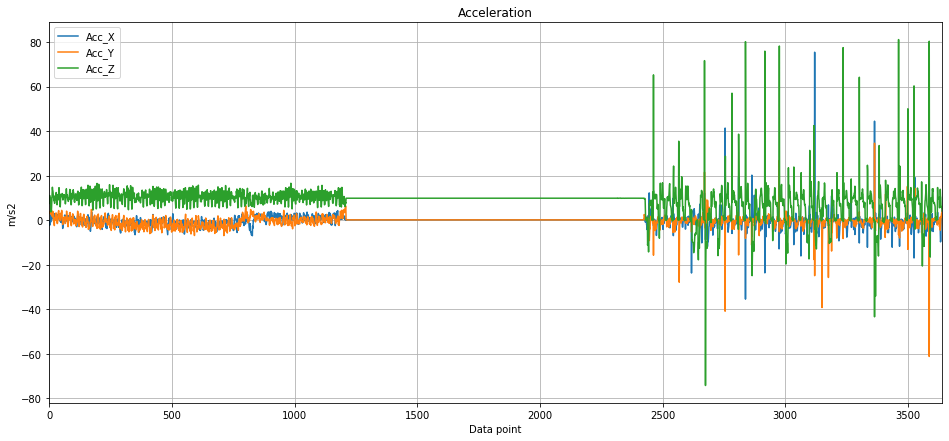

In [86]:
title='Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_master_grp['Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

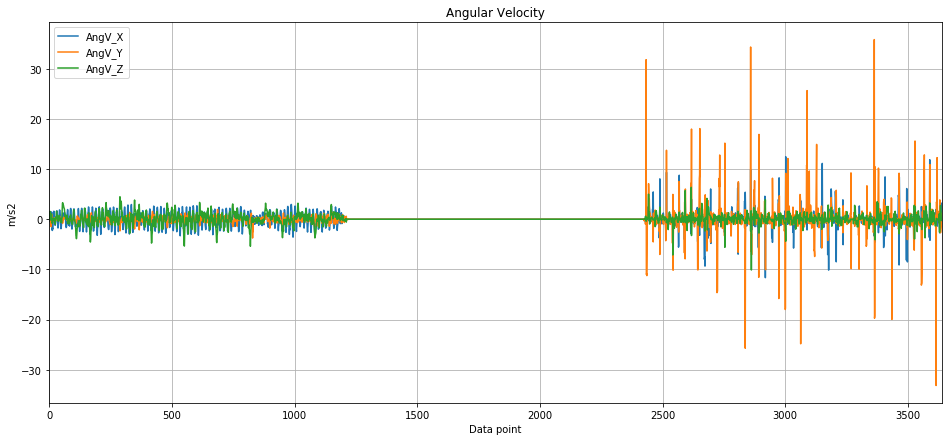

In [92]:
title='Angular Velocity'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_master_grp['AngV_X'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['AngV_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['AngV_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

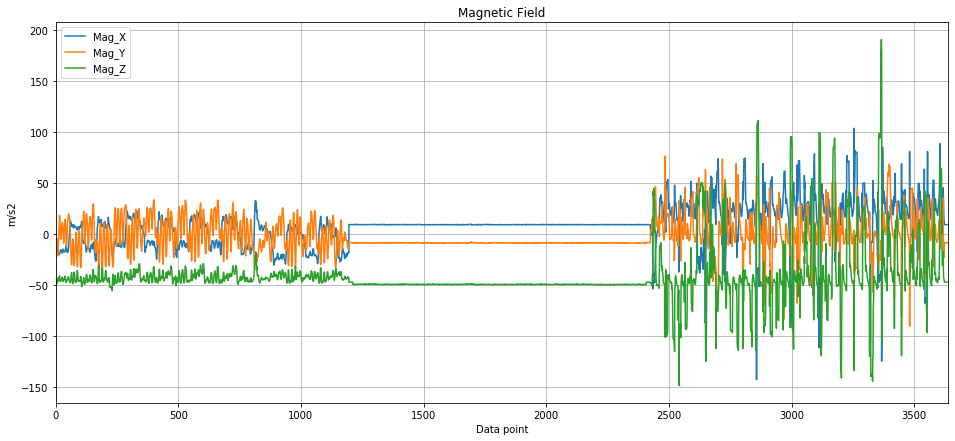

In [93]:
title='Magnetic Field'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_master_grp['Mag_X'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Mag_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Mag_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

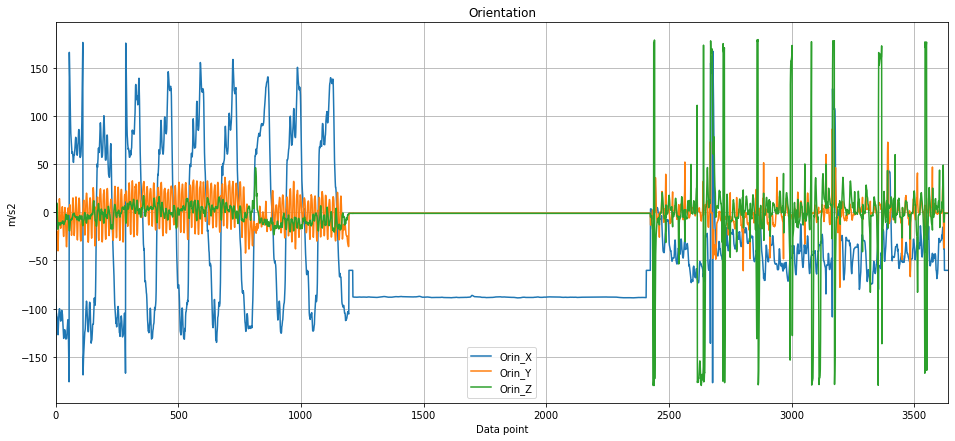

In [94]:
title='Orientation'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_master_grp['Orin_X'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Orin_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Orin_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

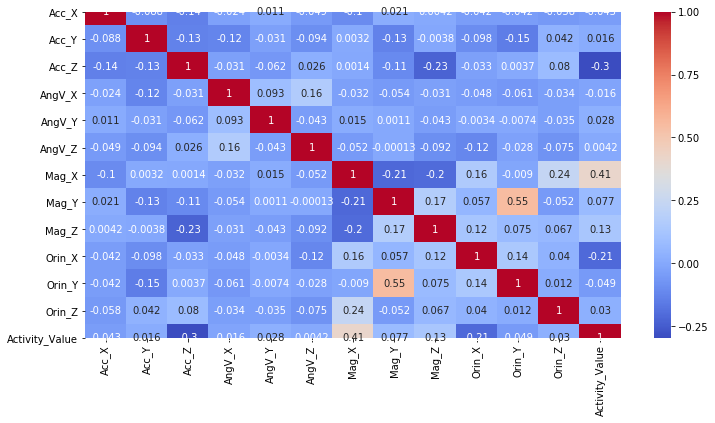

In [95]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(df_master_grp.corr(),cmap='coolwarm',annot=True)

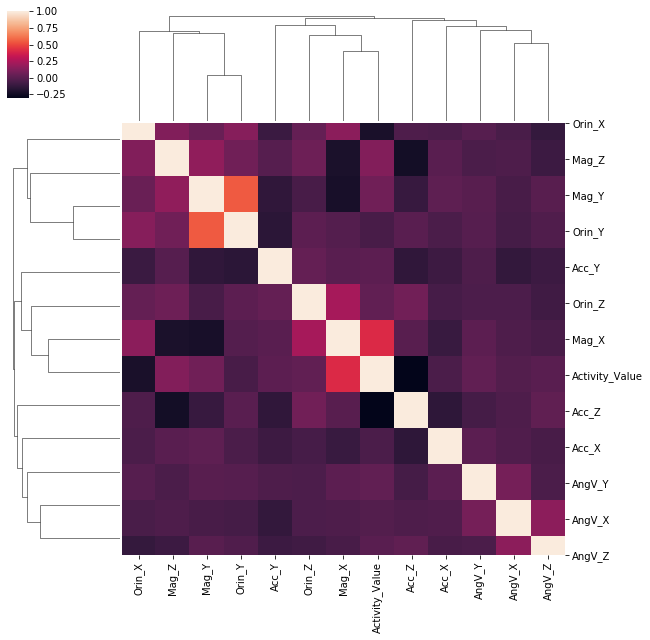

In [96]:
sns.clustermap(df_master_grp.corr())

In [88]:
df_master_grp.to_excel('grouped_Activities.xlsx')

# NN Model

In [39]:
# Imports
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_norm = norm.transform(X)
    X_norm = pd.DataFrame(X_norm, columns=X.columns.values)

    X_norm;
    return X_norm;
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import InputLayer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

In [113]:
def get_nn_simplemodel(n_inputs=5, n_outputs=1, optimizerinput='RMSprop'):
    
    model = Sequential()
    
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    model.add(layers.Dense(2000, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.add(Dense(1, kernel_initializer= 'uniform', activation = 'softmax'))
    
    model.compile(optimizer = optimizerinput, loss = 'binary_crossentropy',
metrics = ['accuracy'])
    return model

In [82]:
# Loading Dataset
df = pd.read_excel('grouped_Activities.xlsx')
df.head()
#df.describe()
#df.info()

   

,Unnamed: 0,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Activity_Value
0,0,2020-12-05 13:31:42.479,-0.373024,3.338807,9.894574,-0.306696,0.121774,-0.012860,-15.610714,-9.701384,-45.315269,-90.290531,-20.854614,-1.578646,Walking,1
1,1,2020-12-05 13:31:42.579,-0.349972,3.130590,8.996741,0.475092,0.237736,0.547077,-15.127773,-10.636854,-45.303429,-93.210211,-22.649603,-1.474825,Walking,1
2,2,2020-12-05 13:31:42.678,-2.262844,3.643873,11.095078,-0.064975,0.486336,1.121323,-13.737292,-9.004610,-45.969810,-98.060699,-22.179592,-0.420587,Walking,1
3,3,2020-12-05 13:31:42.777,-1.526077,3.015629,7.404502,0.045129,0.698615,1.584100,-10.055559,-8.089186,-47.371422,-104.382494,-22.249171,2.664644,Walking,1
4,4,2020-12-05 13:31:42.877,-1.605412,3.552263,8.743168,-0.472488,1.197645,0.164387,-4.993298,-6.964613,-48.111656,-105.524289,-21.243693,9.161114,Walking,1


In [83]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'AngV_X',
       'AngV_Y', 'AngV_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y',
       'Orin_Z', 'Activity', 'Activity_Value'],
      dtype='object')

In [84]:
df_features = ['Acc_X', 'Acc_Y', 'Acc_Z','AngV_X',
       'AngV_Y', 'AngV_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y',
       'Orin_Z']
X = df[df_features]
X.head()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,-0.373024,3.338807,9.894574,-0.306696,0.121774,-0.012860,-15.610714,-9.701384,-45.315269,-90.290531,-20.854614,-1.578646
1,-0.349972,3.130590,8.996741,0.475092,0.237736,0.547077,-15.127773,-10.636854,-45.303429,-93.210211,-22.649603,-1.474825
2,-2.262844,3.643873,11.095078,-0.064975,0.486336,1.121323,-13.737292,-9.004610,-45.969810,-98.060699,-22.179592,-0.420587
3,-1.526077,3.015629,7.404502,0.045129,0.698615,1.584100,-10.055559,-8.089186,-47.371422,-104.382494,-22.249171,2.664644
4,-1.605412,3.552263,8.743168,-0.472488,1.197645,0.164387,-4.993298,-6.964613,-48.111656,-105.524289,-21.243693,9.161114


In [85]:
y = df.Activity_Value
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Activity_Value, dtype: int64

In [86]:
y.describe()

count    3640.000000
mean        2.000824
std         0.816664
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Activity_Value, dtype: float64

In [87]:
X.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000
mean,-0.222847,-0.374939,8.676604,-0.002421,0.040072,0.047745,8.759680,-1.718625,-41.514550,-42.183925,-0.207074,-1.170776
std,2.775218,2.585191,6.430655,1.331803,2.289684,0.921617,20.110743,16.976997,26.347455,66.565038,12.989709,33.836221
min,-35.398987,-61.134071,-74.168516,-11.658416,-33.163933,-10.124564,-142.407135,-90.183540,-148.185059,-177.026402,-77.868474,-179.907814
25%,-0.713641,-0.927771,8.130043,-0.231530,-0.155933,-0.103776,3.667679,-8.485702,-49.073189,-88.242856,-3.402638,-4.136119
50%,0.180674,0.147593,9.869052,0.008706,0.003286,0.001173,9.570612,-8.076317,-46.852005,-60.261881,-0.891641,-1.072601
75%,0.191152,0.159568,10.339187,0.214628,0.146154,0.282675,15.971945,7.016742,-40.609848,-25.083071,2.900275,2.634999
max,75.387132,34.567766,81.057640,12.465687,35.842258,6.369485,104.035507,76.820419,191.054718,176.501144,86.679242,179.488614


In [88]:
X_train_norm=getNormalizedData(X);
X_train_norm.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000
mean,0.317514,0.634879,0.533706,0.483168,0.481174,0.616726,0.613396,0.529717,0.314440,0.381420,0.471969,0.497326
std,0.025050,0.027013,0.041428,0.055206,0.033181,0.055876,0.081604,0.101656,0.077666,0.188288,0.078942,0.094147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313084,0.629103,0.530185,0.473671,0.478334,0.607540,0.592734,0.489197,0.292159,0.251136,0.452549,0.489075
50%,0.321156,0.640339,0.541388,0.483629,0.480641,0.613902,0.616686,0.491648,0.298706,0.330284,0.467809,0.497599
75%,0.321251,0.640465,0.544417,0.492165,0.482712,0.630969,0.642661,0.582024,0.317107,0.429792,0.490853,0.507915
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc10593a810>,
      dtype=object)

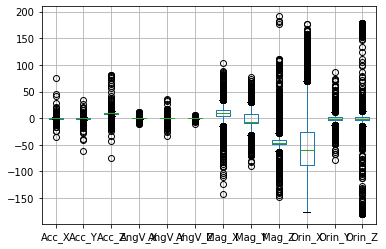

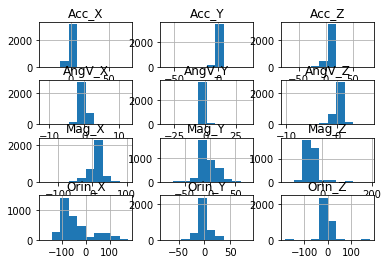

In [89]:
X.boxplot()
X.hist()


In [129]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [132]:
X_train.shape #shape of X_train
X_val.describe

<bound method NDFrame.describe of          Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
3028 -0.026196  0.008682   0.197439 -0.206182  0.655348 -1.142902  72.341568   
1578  0.178728  0.161215   9.870474  0.007330  0.004291  0.002533   9.564901   
1302  0.188009  0.156874   9.874366  0.010253  0.003993  0.000225   9.517540   
3361 -0.102686  0.051643   0.190404 -0.229896 -2.079807 -0.716339 -44.925774   
510  -1.953737 -0.575703  10.984907 -0.084141 -0.461452  0.606113  -5.855019   
...        ...       ...        ...       ...       ...       ...        ...   
2075  0.182770  0.157173   9.869875  0.009449  0.003154  0.001337   9.525640   
2042  0.187710  0.144300   9.867930  0.009589  0.003223 -0.000488   9.644087   
287  -3.423082 -2.890639  10.294393  0.562296 -1.137536  2.302525   6.555599   
3509  2.286196 -2.699486   8.957074 -1.562482  1.194669 -1.312127   4.839499   
717  -0.409997 -0.955613  11.186687 -0.410159  0.278839 -0.240699  17.160639   

     

In [131]:
X_test.shape #shape of X_test
X_test.describe

<bound method NDFrame.describe of          Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
761   0.533640 -1.473236   9.775721 -0.900419 -0.405636  1.241292 -19.227272   
541  -1.527424 -1.654210  12.479549  1.053910 -0.116131  0.038195 -15.029184   
1453  0.183518  0.151186   9.882599  0.008733  0.003665  0.000136   9.480728   
1221  0.173789  0.158221   9.879755  0.003103 -0.011323 -0.000367   9.695539   
3419 -4.077820 -2.395618  15.386354 -0.324665 -0.472404  2.548443  27.726080   
...        ...       ...        ...       ...       ...       ...        ...   
10    0.531545  4.246070   6.684649  1.427992  0.967099  0.745726 -17.793749   
1659  0.183219  0.155527   9.864936  0.008590  0.003674  0.000328   9.540133   
2243  0.184566  0.154479   9.867031  0.006692  0.002359  0.000820   9.630888   
3598 -2.935546 -3.141817   9.072334 -1.065646  2.019395 -0.311473  27.920839   
2698 -0.513732  1.633403  -0.042362  1.168260 -1.504342 -0.104698  62.088318   

     

In [118]:
y_train.shape #shape of y_train
y_test.describe

<bound method NDFrame.describe of 761     1
541     1
1453    2
1221    2
3419    3
       ..
10      1
1659    2
2243    2
3598    3
2698    3
Name: Activity_Value, Length: 728, dtype: int64>

In [94]:
y_test.shape #shape of y_test

(728,)

# Hyperparameter Tuning

In [111]:
#Hyperparameter Tuning to Tune Batch Size and Number of Epochs

from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,y)

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc122148290>,
             iid='warn', n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best: 0.332692 using {'batch_size': 10, 'epochs': 10}
0.332692 (0.470595) with: {'batch_size': 10, 'epochs': 10}
0.332692 (0.470595) with: {'batch_size': 10, 'epochs': 50}
0.332692 (0.470595) with: {'batch_size': 10, 'epochs': 100}
0.332692 (0.470595) with: {'batch_size': 20, 'epochs': 10}
0.332692 (0.470595) with: {'batch_size': 20, 'epochs': 50}
0.332692 (0.470595) with: {'batch_size': 20, 'epochs': 100}
0.332692 (0.470595) with: {'batch_size': 40, 'epochs': 10}
0.332692 (0.470595) with: {'batch_size': 40, 'epochs': 50}
0.332692 (0.470595) with: {'batch_size': 40, 'epochs': 100

In [112]:
#Hyperparameter Tuning to Tune Optimization Algorithm

from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), epochs=10, batch_size=10, n_outputs=1, verbose=0)

optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.332692 using {'optimizerinput': 'RMSprop'}
0.332692 (0.470595) with: {'optimizerinput': 'RMSprop'}
0.332692 (0.470595) with: {'optimizerinput': 'Adagrad'}
0.332692 (0.470595) with: {'optimizerinput': 'Adadelta'}
0.332692 (0.470595) with: {'optimizerinput': 'Adam'}
0.332692 (0.470595) with: {'optimizerinput': 'Adamax'}
0.332692 (0.470595) with: {'optimizerinput': 'Nadam'}


# Running The Model

In [141]:
network=get_nn_simplemodel(len(X.columns),1);
history = network.fit(X_train, y_train, verbose=1, epochs=10, batch_size=10,validation_data=(X_val, y_val))

Epoch 1/10
233/233 [==============================] - 2s 3ms/step - loss: -707.3962 - accuracy: 0.3327 - val_loss: -13299.8066 - val_accuracy: 0.3002
Epoch 2/10
233/233 [==============================] - 1s 3ms/step - loss: -31678.7862 - accuracy: 0.3298 - val_loss: -155438.8594 - val_accuracy: 0.3002
Epoch 3/10
233/233 [==============================] - 1s 3ms/step - loss: -238269.0432 - accuracy: 0.3364 - val_loss: -686231.2500 - val_accuracy: 0.3002
Epoch 4/10
233/233 [==============================] - 1s 2ms/step - loss: -908047.0697 - accuracy: 0.3260 - val_loss: -2008617.7500 - val_accuracy: 0.3002
Epoch 5/10
233/233 [==============================] - 1s 2ms/step - loss: -2471748.8611 - accuracy: 0.3289 - val_loss: -4677814.0000 - val_accuracy: 0.3002
Epoch 6/10
233/233 [==============================] - 1s 2ms/step - loss: -5371751.4380 - accuracy: 0.3462 - val_loss: -9369283.0000 - val_accuracy: 0.3002
Epoch 7/10
233/233 [==============================] - 1s 2ms/step - loss: -1

In [142]:
# Predicting the Test set results
y_pred = network.predict(X_test)
y_pred[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [143]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Activity_Value, dtype: int64

# Graphs

     loss_train      loss_val  diff_in_loss
0 -2.853913e+03 -1.329981e+04  1.044589e+04
1 -6.116033e+04 -1.554389e+05  9.427853e+04
2 -3.548785e+05 -6.862312e+05  3.313528e+05
3 -1.200162e+06 -2.008618e+06  8.084555e+05
4 -3.036974e+06 -4.677814e+06  1.640840e+06
5 -6.517868e+06 -9.369283e+06  2.851416e+06
6 -1.231850e+07 -1.706476e+07  4.746257e+06
7 -2.142107e+07 -2.852352e+07  7.102458e+06
8 -3.469380e+07 -4.500233e+07  1.030852e+07
9 -5.318300e+07 -6.769850e+07  1.451550e+07


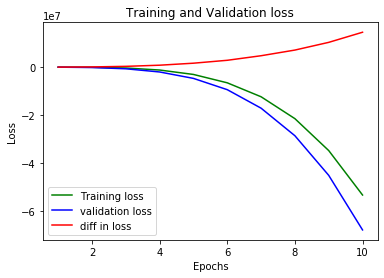

In [144]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

diff_in_loss=abs(np.subtract(loss_val,loss_train));

df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


   accuracy_train  accuracy_val  diff_in_accuracy
0        0.332761      0.300172          0.032589
1        0.332761      0.300172          0.032589
2        0.332761      0.300172          0.032589
3        0.332761      0.300172          0.032589
4        0.332761      0.300172          0.032589
5        0.332761      0.300172          0.032589
6        0.332761      0.300172          0.032589
7        0.332761      0.300172          0.032589
8        0.332761      0.300172          0.032589
9        0.332761      0.300172          0.032589


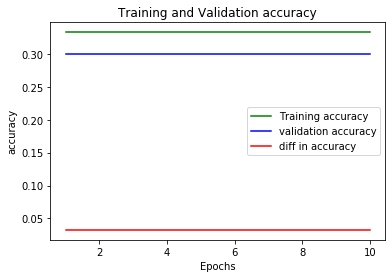

In [145]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']

diff_in_accuracy=abs(np.subtract(accuracy_val,accuracy_train));

df = pd.DataFrame({'accuracy_train':accuracy_train, 'accuracy_val':accuracy_val, 'diff_in_accuracy':diff_in_accuracy})

print(df.head(10))

epochs = range(1,len(accuracy_train)+1)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.plot(epochs, diff_in_accuracy, 'r', label='diff in accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()